In [20]:
import sys
sys.path.append("notebooks/scripts/")

## Define inputs, outputs, and parameters

In [44]:
import matplotlib.pyplot as plt 
import pandas as pd

In [45]:
within_between_df_training = pd.read_csv(snakemake.input.within_between_df_training)
within_between_df_test = pd.read_csv(snakemake.input.within_between_df_test)
within_between_df_sars_training = pd.read_csv(snakemake.input.within_between_df_sars_training)
within_between_df_sars_test = pd.read_csv(snakemake.input.within_between_df_sars_test)
#within_between_df_training = pd.read_csv("../seasonal-flu-nextstrain/results/full_within_between_stats.csv")
#within_between_df_test = pd.read_csv("../seasonal-flu-nextstrain-2018-2020/results/full_within_between_stats.csv")
#within_between_df_sars_training = pd.read_csv("../sars-cov-2-nextstrain/results/full_within_between_stats.csv")
#within_between_df_sars_test = pd.read_csv("../sars-cov-2-nextstrain-2022-2023/results/full_within_between_stats.csv")

NameError: name 'snakemake' is not defined

In [ ]:
png_chart_flu = snakemake.output.flu_png
png_chart_sars = snakemake.output.sars_png

In [25]:
def make_subplot(df, ax):
    x_positions = np.arange(len(df.to_numpy()) // 2)
    
    ax.errorbar(df[df["comparison"] == "within"]["mean"][::-1], x_positions, xerr= df[df["comparison"] == "within"]["std"][::-1], fmt='o', color="blue", label="within", capsize=2)
    ax.errorbar(df[df["comparison"] == "between"]["mean"][::-1], x_positions + 0.1, xerr= df[df["comparison"] == "between"]["std"][::-1], fmt='o', color="orange", label="between", capsize=2)
    ax.set_yticklabels([""] + list(df[df["comparison"] == "within"]["group"])[::-1])
    ax.set_xlim(0, 70)

    sns.despine()
    return ax

/home/nandsra/anaconda3/envs/cartography/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/home/nandsra/anaconda3/envs/cartography/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


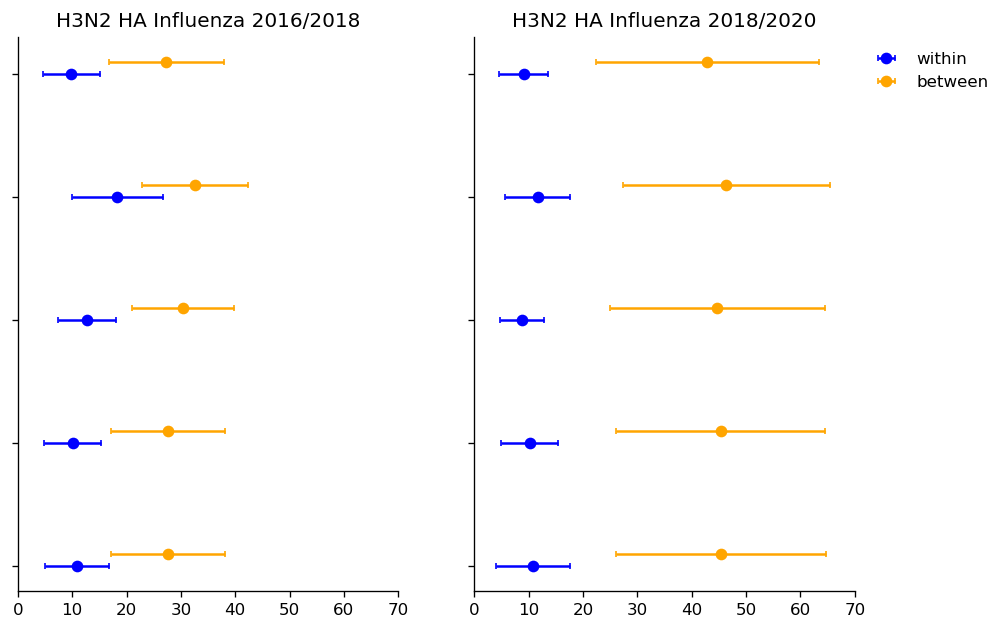

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(9, 6), dpi=120, sharey=True)

make_subplot(within_between_df_training, ax[0])
make_subplot(within_between_df_test, ax[1])

ax[0].set_title("H3N2 HA Influenza 2016/2018")
ax[1].set_title("H3N2 HA Influenza 2018/2020")
ax[1].set_yticklabels([])
ax[1].legend(
    frameon=False,
    bbox_to_anchor=(1.0, 1.0), 
    loc="upper left"
)
plt.subplots_adjust(hspace=.0)
sns.despine()
plt.savefig(png_chart_flu)
#early and late side by side instead of below eachother

In [27]:
def make_subplot_sars(df, ax, nextstrain_or_pango, label): #'Nextstrain_clade' or 'pango'
    grouped = df.groupby(df["group"].str.contains(nextstrain_or_pango))
    
    group = grouped.get_group(True)

    y_ticklabels = []

    x_positions = np.arange(len(group.to_numpy()) // 2)

    ax.errorbar(group[group["comparison"] == "within"]["mean"][::-1], x_positions, xerr= group[group["comparison"] == "within"]["std"][::-1], fmt='o', color="blue", label=label + " within", capsize=2)
    ax.errorbar(group[group["comparison"] == "between"]["mean"][::-1], x_positions + 0.2, xerr= group[group["comparison"] == "between"]["std"][::-1], fmt='o', color="orange", label=label + " between", capsize=2)
    y_ticklabels = [""] + [val.replace("_for_" + str(nextstrain_or_pango), "") for val in list(group[group["comparison"] == "within"]["group"])[::-1]]
    y_ticklabels[-1] = "clade_membership"

    ax.set_yticklabels(y_ticklabels)
    ax.set_xlim(0, 70)

    sns.despine()
    
    return ax

/home/nandsra/anaconda3/envs/cartography/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app
/home/nandsra/anaconda3/envs/cartography/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app
/home/nandsra/anaconda3/envs/cartography/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app
/home/nandsra/anaconda3/envs/cartography/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


NameError: name 'png_chart_sars' is not defined

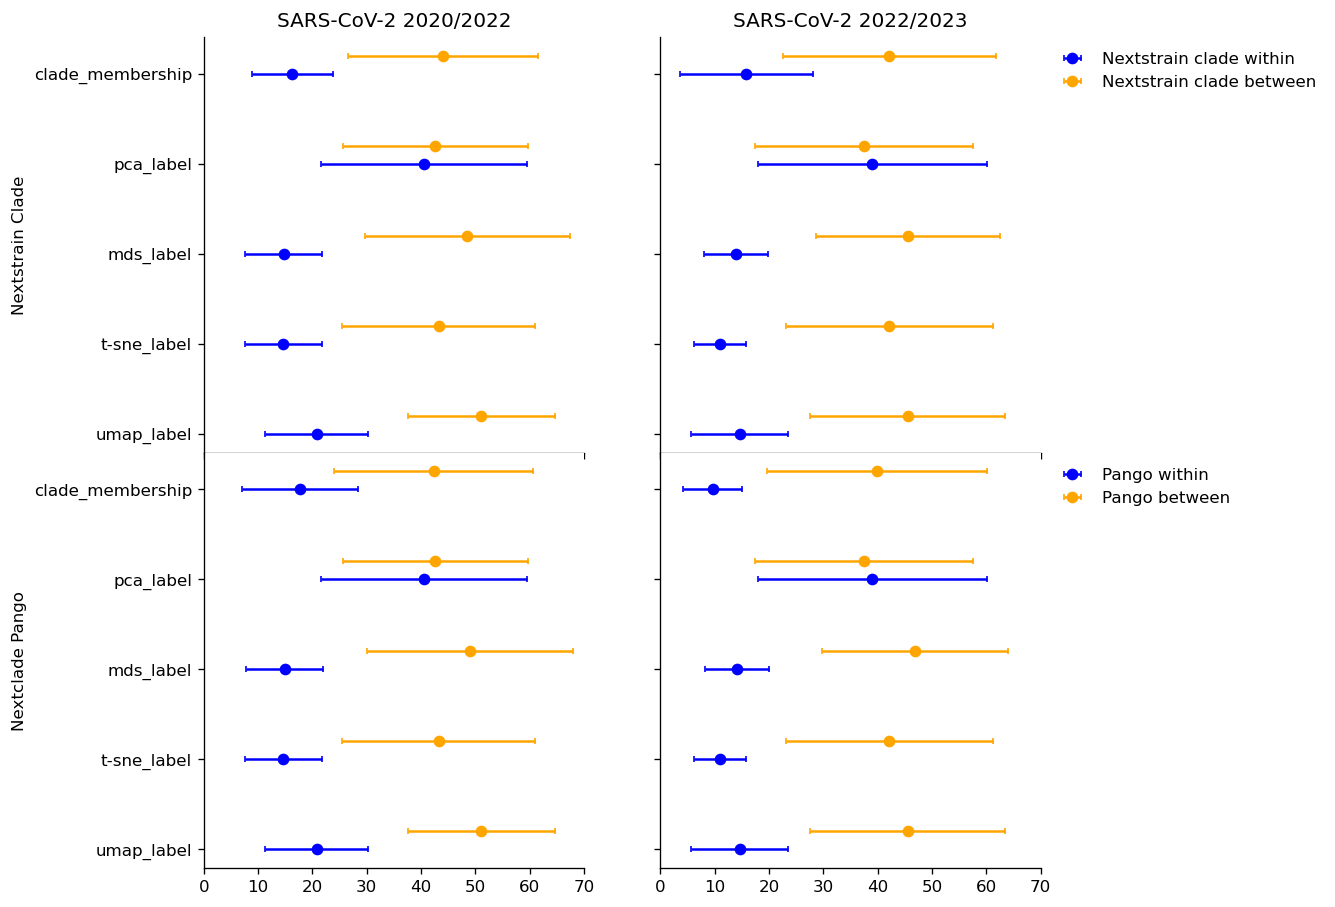

In [43]:
fig, ax = plt.subplots(2, 2, figsize=(9,9), dpi=120, sharex=True, sharey=True)
make_subplot_sars(within_between_df_sars_training, ax[0][0], 'Nextstrain_clade', "Nextstrain clade") # early, nextclade
make_subplot_sars(within_between_df_sars_test, ax[0][1], 'Nextstrain_clade', "Nextstrain clade") # late, nextclade
make_subplot_sars(within_between_df_sars_training, ax[1][0], 'Nextclade_pango_collapsed', "Pango") # early, pango
make_subplot_sars(within_between_df_sars_test, ax[1][1], 'Nextclade_pango_collapsed', "Pango") # late, pango
# late - each method represented twice
# clade membership should have both nextstrain clade and pango lineages
# share row and col (2 by 2 figures) - left nextstrain clade, right  pango 
# generate both within_between dataframes for diff clade membership definitions

ax[0][0].set_title("SARS-CoV-2 2020/2022")
ax[0][1].set_title("SARS-CoV-2 2022/2023")
ax[0][0].set_ylabel("Nextstrain Clade")
ax[1][0].set_ylabel("Nextclade Pango")

ax[0][1].legend(
    frameon=False,
    bbox_to_anchor=(1.0, 1.0), 
    loc="upper left"
)

ax[1][1].legend(
    frameon=False,
    bbox_to_anchor=(1.0, 1.0), 
    loc="upper left"
)
    
plt.subplots_adjust(hspace=.0)#, wspace=.0)
sns.despine()
plt.savefig(png_chart_sars)

# make x axis bigger, move legend to x axis of one chart (rotate legend in another way, add y axis buffer to each figure)
# replace variable names (pca_label -> pca)
# replace clade_membership with actual clade_membership
# use nextclade_pango_collapsed in legend not just pango
# x axis label (pairwise genetic distance (nucleotides))